In [8]:
import torch
import matplotlib.pyplot as plt
import os

from model import GPT,GPTconfig
from utils import generate

There are 382 statedicts while training 1 epoch at `/media/vamsi/'New Volume'/model-state-dict/modelvers`

In [4]:
config = GPTconfig(vocab_size=50304)
model = GPT(config)
model.to('cuda')

The number of parameters : 124.48M


GPT(
  (transformer): ModuleDict(
    (wpe): Embedding(1024, 768)
    (wte): Embedding(50304, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CasualSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50304, bias=False)
)

In [76]:
model_path = os.path.join('/media/vamsi', 'New Volume', 'model-state-dict', 'modelvers', 'model_state_380.pth')

In [77]:
loaded_state_dict = torch.load(model_path)
model.load_state_dict(loaded_state_dict)

/tmp/ipykernel_28683/1094553970.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_state_dict = torch.load(model_path)


<All keys matched successfully>

In [78]:
loaded_cpu={k: v.cpu() for k, v in loaded_state_dict.items()}

In [79]:
generate(model,1,'cuda',60,0,input_text="Hello I'm a language model,")

------->>> Rank 0 Sample 0 : 
 |||---->> Hello I'm a language model, but I hope this will also give you your son a "free”.
My 3D-year-old friend, who uses the word “free” to mean the same word to “free” when “free” is


In [88]:
loaded_cpu['transformer.wte.weight'].shape

torch.Size([50304, 768])

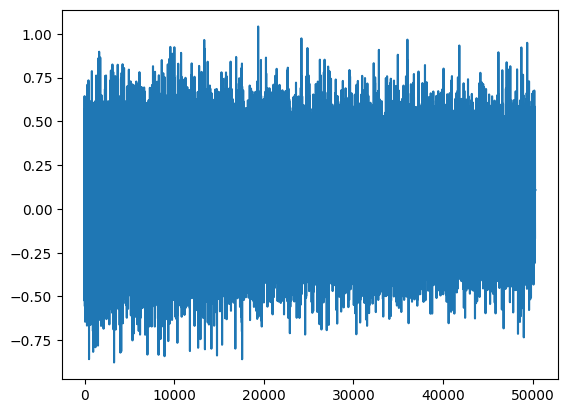

In [86]:
plt.plot(loaded_cpu['transformer.wte.weight'][:,1])

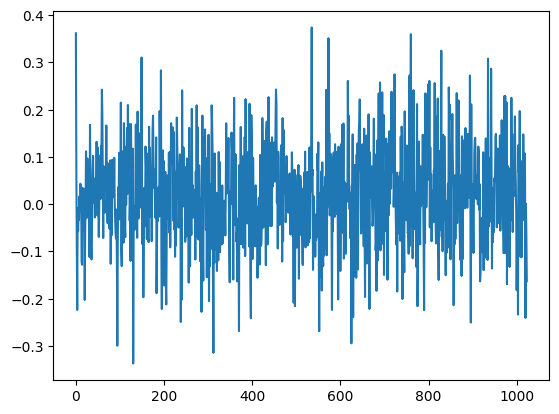

In [85]:
plt.plot(loaded_cpu['transformer.wpe.weight'][:,6])